# Breast Cancer Detection

Breast cancer detection aims to identify cancerous cells or tumors in the breast at an early stage, which improves the chances of successful treatment. Several techniques are used for breast cancer detection, such as:

1. **Mammography**: A specialized X-ray imaging technique used to examine the breast tissue for any abnormal growths or masses.
2. **Ultrasound**: High-frequency sound waves that help distinguish between solid tumors and fluid-filled cysts.
3. **MRI (Magnetic Resonance Imaging)**: Provides detailed images of the breast tissue using magnetic fields and radio waves.
4. **Biopsy**: A sample of tissue is taken from a suspicious area and analyzed to confirm whether it is cancerous.

Recent advances have also led to the use of **machine learning models** to assist in breast cancer detection. These models analyze imaging data to identify patterns indicative of cancerous growths, reducing human error and providing faster, more accurate results.

## Import all necessary modules

In [3]:
# for loading data set
import pandas as pd
import numpy as np

# for graph ploting
import matplotlib.pyplot as plt
import seaborn as sns

# for loading models and its metrics
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Loading dataset

In [5]:
df = pd.read_csv("data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Data validation and checking

In [7]:
df.shape

(569, 33)

In [8]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [9]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


#### Since there are no null values i shall remove unnecessary columns

In [11]:
df = df.drop(['id', 'Unnamed: 32'], axis = 'columns')

In [12]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


#### Converting categorical data into numeric data (Malignant(M) = 0, Benign(B) = 1)

In [14]:
df['diagnosis'] = df['diagnosis'].map({'M': 0, 'B': 1}) 

In [15]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## EDA

#### Correlation Matrix to understand relationships between features

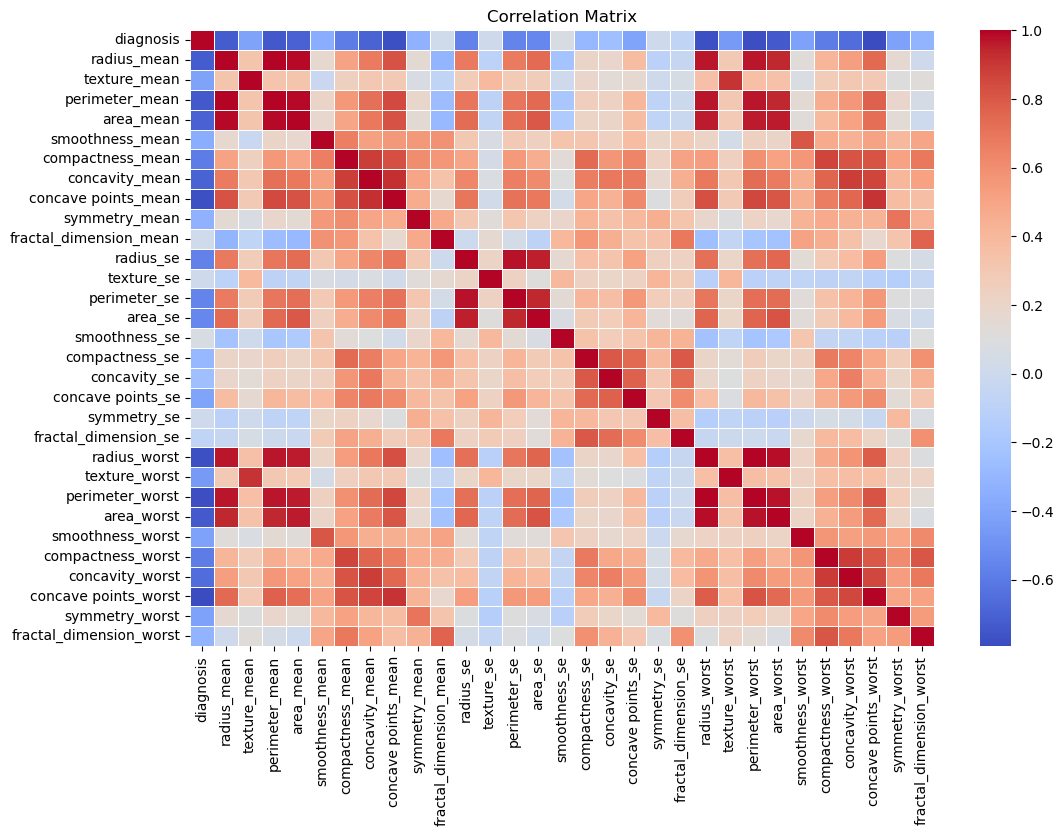

In [18]:
plt.figure(figsize=(12, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

#### Visualizing the distribution of the target variable (class)

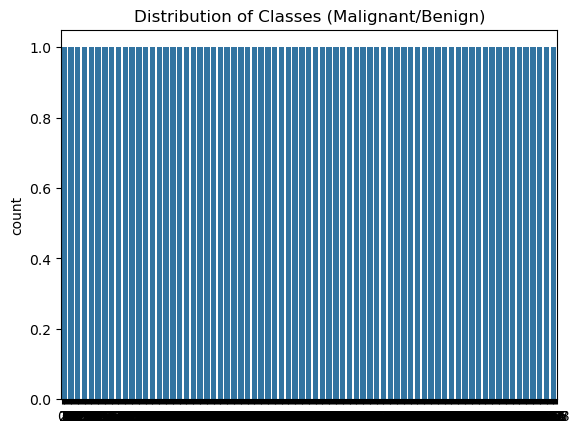

In [20]:
sns.countplot(df['diagnosis'])
plt.title('Distribution of Classes (Malignant/Benign)')
plt.show()

#### Pairplot to observe relationships between features (you can select a few important features)

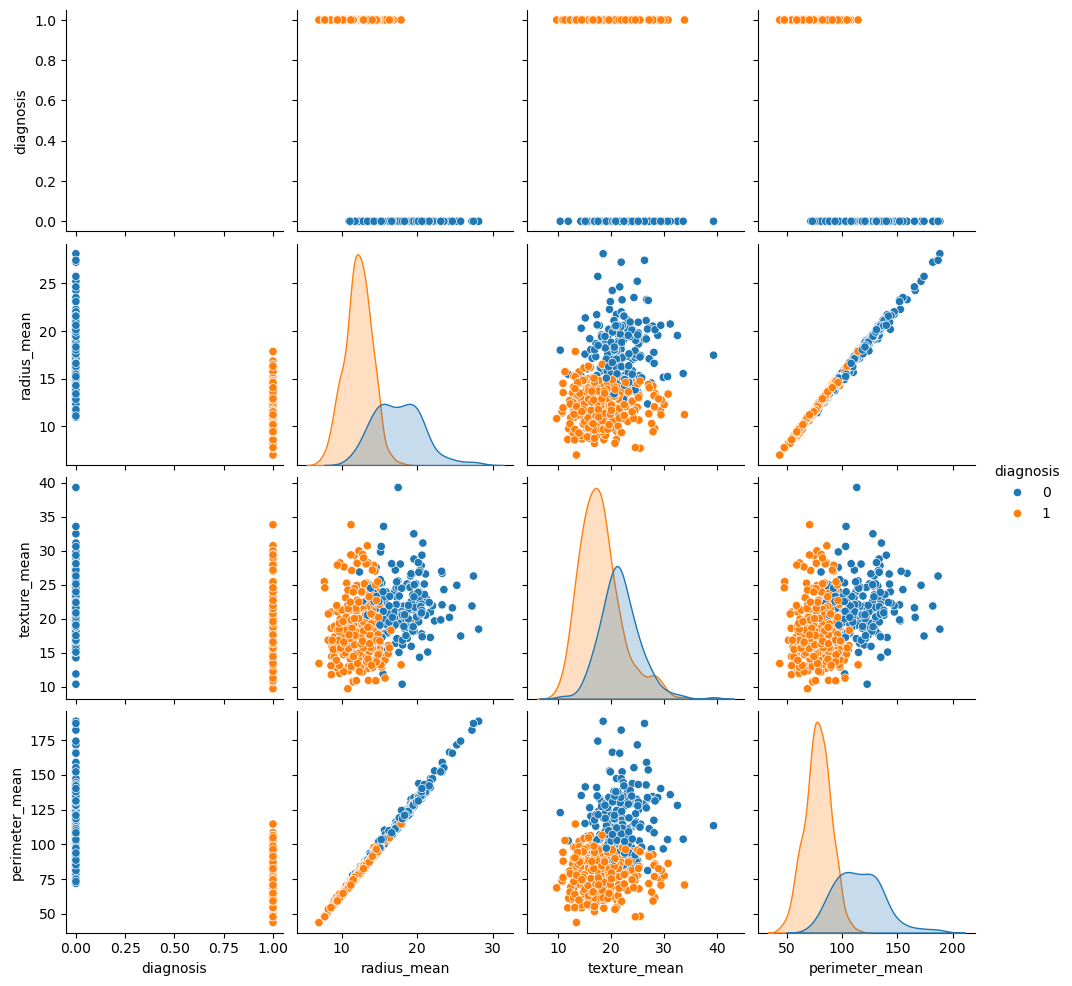

In [49]:
numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()

sns.pairplot(df, vars=numerical_features[:4], hue="diagnosis")
plt.show()

## Data processing 

#### Spliting of data into train and test data

In [51]:
X = df.drop('diagnosis', axis = 'columns')
y = df['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

### Model training and testing


In [53]:
model = SVC()
model.fit(X_train, y_train)

SVC()

#### Model Evaluation

In [55]:
y_predict = model.predict(X_test)

#### Accuracy and classification report

In [57]:
accuracy = accuracy_score(y_test, y_predict)
print(accuracy)
report = classification_report(y_test, y_predict)
print(report)

0.9298245614035088
              precision    recall  f1-score   support

           0       1.00      0.82      0.90        45
           1       0.90      1.00      0.95        69

    accuracy                           0.93       114
   macro avg       0.95      0.91      0.92       114
weighted avg       0.94      0.93      0.93       114



#### Confusion Matrix

In [59]:
cn = confusion_matrix(y_test, y_predict)

Text(50.722222222222214, 0.5, 'Predicted value')

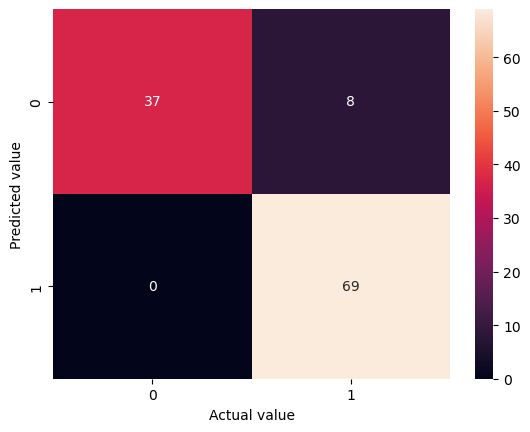

In [61]:
sns.heatmap(cn, annot=True)
plt.xlabel('Actual value')
plt.ylabel('Predicted value')

## Testing

#### For Benign test

In [79]:
sample_benign = {
    'radius_mean': 14.23,
    'texture_mean': 15.76,
    'perimeter_mean': 92.97,
    'area_mean': 654.52,
    'smoothness_mean': 0.097,
    'compactness_mean': 0.080,
    'concavity_mean': 0.018,
    'concave points_mean': 0.004,
    'symmetry_mean': 0.179,
    'fractal_dimension_mean': 0.065,
    'radius_se': 0.46,
    'texture_se': 1.06,
    'perimeter_se': 2.63,
    'area_se': 23.24,
    'smoothness_se': 0.004,
    'compactness_se': 0.022,
    'concavity_se': 0.020,
    'concave points_se': 0.007,
    'symmetry_se': 0.023,
    'fractal_dimension_se': 0.004,
    'radius_worst': 15.00,
    'texture_worst': 19.42,
    'perimeter_worst': 97.52,
    'area_worst': 703.35,
    'smoothness_worst': 0.124,
    'compactness_worst': 0.116,
    'concavity_worst': 0.066,
    'concave points_worst': 0.025,
    'symmetry_worst': 0.246,
    'fractal_dimension_worst': 0.087,
    'diagnosis': 1  # Benign
}

sample_data_b = pd.DataFrame(sample_benign, index = [0])
# sample_data.head()
sample_x_b = sample_data_b.drop('diagnosis', axis = 'columns')
sample_y_b = sample_data_b['diagnosis']

sample_y_pred_b = model.predict(sample_x_b)


if sample_y_b[0] == sample_y_pred_b[0]:
    print("it predicted Benign")
else:
    print("It predicted malignant, which is wrong")
# print(sample_y_b[0])
# print(sample_y_pred_b[0])

it predicted Benign


#### For Malignant test

In [81]:
sample_malignant = {
    'radius_mean': 17.57,
    'texture_mean': 21.26,
    'perimeter_mean': 113.53,
    'area_mean': 986.52,
    'smoothness_mean': 0.111,
    'compactness_mean': 0.131,
    'concavity_mean': 0.226,
    'concave points_mean': 0.144,
    'symmetry_mean': 0.220,
    'fractal_dimension_mean': 0.087,
    'radius_se': 1.02,
    'texture_se': 2.29,
    'perimeter_se': 7.87,
    'area_se': 46.15,
    'smoothness_se': 0.008,
    'compactness_se': 0.030,
    'concavity_se': 0.062,
    'concave points_se': 0.035,
    'symmetry_se': 0.037,
    'fractal_dimension_se': 0.008,
    'radius_worst': 19.65,
    'texture_worst': 29.53,
    'perimeter_worst': 126.70,
    'area_worst': 1052.80,
    'smoothness_worst': 0.161,
    'compactness_worst': 0.232,
    'concavity_worst': 0.402,
    'concave points_worst': 0.156,
    'symmetry_worst': 0.412,
    'fractal_dimension_worst': 0.092,
    'diagnosis': 0  # Malignant
}

sample_data_m = pd.DataFrame(sample_malignant, index = [0])
# sample_data.head()
sample_x_m = sample_data_m.drop('diagnosis', axis = 'columns')
sample_y_m = sample_data_m['diagnosis']

sample_y_pred_m = model.predict(sample_x_m)


if sample_y_m[0] == sample_y_pred_m[0]:
    print("it predicted Malignant")
else:
    print("It predicted Benign, which is wrong")
# print(sample_y_b[0])
# print(sample_y_pred_b[0])

it predicted Malignant


## Conclusion

In this notebook, we performed exploratory data analysis (EDA) on the Breast Cancer Wisconsin dataset to understand the relationships between various features and the target variable (diagnosis). We used a Support Vector Classifier (SVC) model to classify breast cancer as benign or malignant.

After preprocessing the data, the SVC model successfully learned the patterns in the dataset, providing a reliable classification of breast cancer instances. The model's performance can be further improved by tuning hyperparameters and applying additional techniques like feature scaling and cross-validation.

Overall, this approach demonstrates the power of machine learning in early breast cancer detection, which can aid in timely diagnosis and treatment.